<center>
    <h2 align='center'> Xây Dựng mô hình học máy  </h2>
<h2> Dự đoán bệnh tiểu đường  </h2>
</center>


In [1]:
# Khai báo thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### A. MÔ TẢ TẬP DỮ LIỆU 
Tập dữ liệu Data_Diabetes.csv bao gồm  kết quả xét nghiệm bệnh tiểu đường của 723 
bệnh nhân toàn bộ là nữ giới. Mỗi bản ghi tương ứng với một bệnh nhân, bao gồm 9 thuộc 
tính: 
1. Pregnancies: Số lần mang thai 
2. Glucose: Chỉ số Gluco  
3. BloodPressur: Huyết áp (đơn vị: mm Hg) 
4. SkinThickness: Mức độ dày da (đơn vị: mm) 
5. Insulin: Chỉ số Insulin (đơn vị: mu U/ml) 
6. BMI: Chỉ số BMI của cơ thể (được tính bằng = Cân nặng / chiều cao2) 
7. DiabetesPedigreeFunction: Chức năng phả hệ của bệnh tiểu đường 
8. Age: Tuổi 
9. Outcome: Thuộc tính cho biết bệnh nhân có mắc bệnh tiểu đường hay không?  
Không bị tiểu đường (0) – Bị tiểu đường (1)
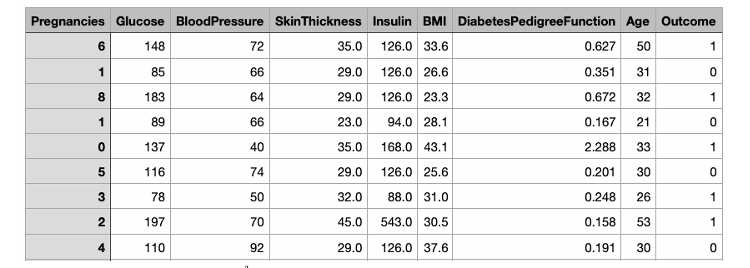
Tập dữ liệu đã được làm sạch để sử dụng cho mô hình học máy 


### 1. Đọc file dữ liệu, quan sát dữ liệu và các đặc trưng thống kê của tập dữ liệu 

In [2]:
# Đọc tập dữ liệu
data= pd.read_csv('Data/Data_Diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               723 non-null    int64  
 1   Glucose                   723 non-null    int64  
 2   BloodPressure             723 non-null    int64  
 3   SkinThickness             723 non-null    float64
 4   Insulin                   723 non-null    float64
 5   BMI                       723 non-null    float64
 6   DiabetesPedigreeFunction  723 non-null    float64
 7   Age                       723 non-null    int64  
 8   Outcome                   723 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 51.0 KB


In [3]:
#Quan sát dữ liệu:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,126.0,33.6,0.627,50,1
1,1,85,66,29.0,126.0,26.6,0.351,31,0
2,8,183,64,29.0,126.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
718,10,101,76,48.0,180.0,32.9,0.171,63,0
719,2,122,70,27.0,126.0,36.8,0.340,27,0
720,5,121,72,23.0,112.0,26.2,0.245,30,0
721,1,126,60,29.0,126.0,30.1,0.349,47,1


In [4]:
#Quan sát đặc trưng thống kê cảu tập dữ liệu
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,3.869986,121.928077,72.467497,29.147994,142.435685,32.473582,0.474649,33.367911,0.344398
std,3.363438,30.746940,12.256605,9.017616,88.624795,6.891518,0.332530,11.764549,0.475501
min,0.000000,44.000000,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,25.000000,119.500000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,126.000000,32.400000,0.378000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,131.000000,36.600000,0.628000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### nhận xét:
**Pregnancies:**

- Trung bình là khoảng 3.87 lần mang thai, với số lần mang thai tối đa lên tới 17. Điều này cho thấy có một số bệnh nhân có nhiều lần mang thai hơn bình thường.

**Glucose:**
- Giá trị trung bình là 121.93 mg/dL, với giá trị tối thiểu là 44 và tối đa là 199. Điều này cho thấy có sự đa dạng lớn trong chỉ số glucose.

**BloodPressure:**
- Trung bình là 72.47 mm Hg, với giá trị tối thiểu là 30 và tối đa là 122. Có thể cần kiểm tra các giá trị bất thường ở những bệnh nhân có huyết áp rất thấp hoặc rất cao.

**SkinThickness:**
- Trung bình là 29.15 mm, cho thấy độ dày da của bệnh nhân là khá đồng nhất nhưng có thể có một số giá trị cực đại.

**Insulin:**
- Giá trị trung bình là 142.44 mu U/ml, với giá trị tối đa là 846, cho thấy có một số bệnh nhân có mức insulin rất cao.

**BMI:**
- Giá trị trung bình là 32.47, cho thấy một mức độ béo phì trong nhóm bệnh nhân.

**DiabetesPedigreeFunction:**
- Trung bình là 0.47, cho thấy có sự di truyền liên quan đến bệnh tiểu đường trong nhóm bệnh nhân.

**Age:**
- Tuổi trung bình của bệnh nhân là 33.37, với độ tuổi tối đa là 81.

**Outcome:**
- Trung bình là 0.34, cho thấy khoảng 34% bệnh nhân trong tập dữ liệu này được chẩn đoán mắc bệnh tiểu đường.

### 2. Phân tách Biến Đầu vào: X - Biến phụ thuộc (Nhãn): y
---

* Biến độc lập X: 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'
* Biến phụ thuộc (nhãn) y: 'Outcome'

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,126.0,33.6,0.627,50,1
1,1,85,66,29.0,126.0,26.6,0.351,31,0
2,8,183,64,29.0,126.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
#biến độc lập  x:

X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.0,126.0,33.6,0.627,50
1,1,85,66,29.0,126.0,26.6,0.351,31
2,8,183,64,29.0,126.0,23.3,0.672,32
3,1,89,66,23.0,94.0,28.1,0.167,21
4,0,137,40,35.0,168.0,43.1,2.288,33


In [8]:
#Biến phụ thuuocj y
y = data[['Outcome']]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


Outcome
0    474
1    249
Name: count, dtype: int64


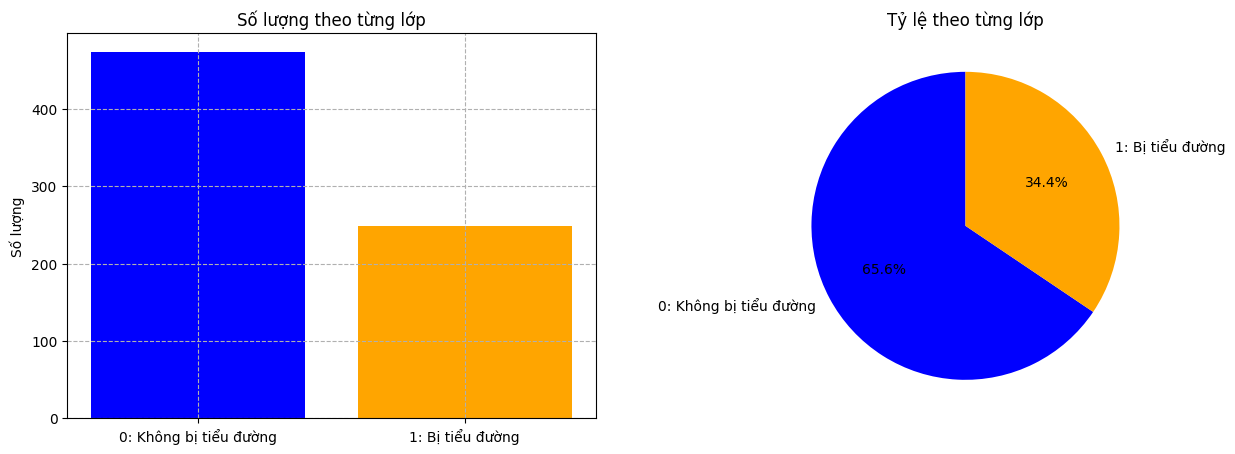

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc tập dữ liệu
data = pd.read_csv('Data/Data_Diabetes.csv')

# Kiểm tra cân bằng dữ liệu
check_y = data['Outcome'].value_counts()
label_x = ['0: Không bị tiểu đường', '1: Bị tiểu đường']
print(check_y)

# Vẽ biểu đồ thể hiện số lượng theo từng lớp
plt.figure(figsize=(15, 5))

# Vẽ biểu đồ cột
plt.subplot(1, 2, 1)
plt.bar(label_x, check_y.values, color=['blue', 'orange'])
plt.title('Số lượng theo từng lớp')
plt.ylabel('Số lượng')
plt.grid(ls='--')

# Vẽ biểu đồ tròn
plt.subplot(1, 2, 2)
plt.pie(check_y.values,
        labels=label_x,
        autopct='%.1f%%',
        startangle=90,
        colors=['blue', 'orange'])
plt.title('Tỷ lệ theo từng lớp')

plt.show()



In [10]:
#nhận xét: tập dữ liệu mất cân bằng nhẹ ( 1 chiếm 34,4% )

### thực hiện cân bằng dữ liệu với SMOTE
---
SMOTE (Synthetic Minority Over-sampling Technique) hoạt động bằng các tạo ra các mẫu tổng hợp từ lớp thiểu số thay cho việc tạo ra các bản sao. Thuật toán chọn 2 hay nhiều trường hợp giống nhau (sử dụng thước đo khoảng cách để so sánh) và xáo trộn một cá thể một thuộc tính tại một thời điểm bằng một lượng ngẫu nhiên trong khoảng chênh lệnh với các trường hợp lân cận



In [11]:
from imblearn.over_sampling import SMOTE

# Áp dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(sampling_strategy=0.9, k_neighbors=8)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Chuyển y_resampled thành mảng 1D nếu nó là DataFrame
y_resampled = y_resampled.values.ravel()


In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Áp dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(sampling_strategy=0.9, k_neighbors=8)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Chuyển y_resampled thành mảng 1D nếu nó là DataFrame
y_resampled = y_resampled.values.ravel()


# Kiểm tra phân phối các lớp sau cân bằng
print("Số mẫu sau cân bằng:", Counter(y_resampled))
print("Kích thước X_resampled:", X_resampled.shape)


Số mẫu sau cân bằng: Counter({0: 474, 1: 426})
Kích thước X_resampled: (900, 8)


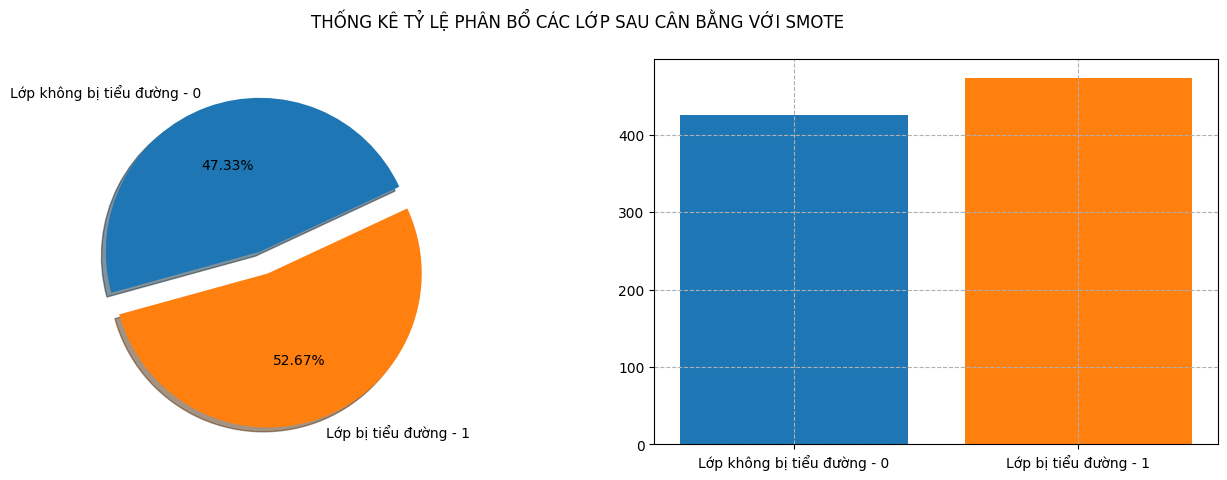

In [17]:
from collections import Counter
import matplotlib.pyplot as plt

# Đếm số lượng mỗi lớp sau khi cân bằng
counter_resampled = Counter(y_resampled)

# Lấy số lượng các lớp
class_y = list(counter_resampled.values())

# Định nghĩa tên các lớp
labels = ["Lớp không bị tiểu đường - 0", "Lớp bị tiểu đường - 1"]

# Trực quan hóa tỷ lệ phân bố các lớp
plt.figure(figsize=(16,5))

# Biểu đồ tròn thể hiện tỷ lệ và số lượng mẫu theo từng lớp
plt.subplot(1,2,1)
plt.pie(class_y, explode=[0, 0.15], autopct='%1.2f%%', shadow=True,
        labels=labels, startangle=25, colors=['#1E77B4','#FF7F0F'])

# Biểu đồ cột thể hiện tổng số lượng mẫu theo từng lớp
plt.subplot(1,2,2)
plt.bar(labels, class_y, color=['#1E77B4','#FF7F0F'])
plt.grid(ls='--')
plt.suptitle('THỐNG KÊ TỶ LỆ PHÂN BỔ CÁC LỚP SAU CÂN BẰNG VỚI SMOTE', fontsize=12)
plt.show()


### 4 Chia tập dữ liệu ra tập Training - Test: 
---
1. Biến độc lập X --> X_train, X_test
2. Biến phụ thuộc y --> y_train, y_test

* Tập Training set (X_train, y_train): dùng để huấn luyện mô hình (80%)
* Tập Test set (X_test, y_test): dùng để kiểm thử mô hình (20%)

In [18]:
#Gọi hàm tách dữ liệu train_test_split trong thư viện sklearn.model_selection:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X,y,
                                                     test_size=0.2,   #cách 1 thiết lập tập test cacahs 2 nếu train thì 0.8
                                                     shuffle=True,    #trộn duwxx liệu lấy ngẫu nhiên
                                                      random_state=42
                                                     )

print('SỐ lượng mẫu ban đầu: ',len(y))
print('SỐ lượng mẫu tập train: ',len(y_train))
print('SỐ lượng mẫu tập test: ',len(y_test))


SỐ lượng mẫu ban đầu:  723
SỐ lượng mẫu tập train:  578
SỐ lượng mẫu tập test:  145


In [19]:

X_train


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
445,4,114,64,29.0,126.0,28.9,0.126,24
6,3,78,50,32.0,88.0,31.0,0.248,26
363,8,105,100,36.0,126.0,43.3,0.239,45
595,13,104,72,29.0,126.0,31.2,0.465,38
371,2,127,58,24.0,275.0,27.7,1.600,25
...,...,...,...,...,...,...,...,...
71,5,95,72,33.0,126.0,37.7,0.370,27
106,7,160,54,32.0,175.0,30.5,0.588,39
270,5,155,84,44.0,545.0,38.7,0.619,34
435,5,88,78,30.0,126.0,27.6,0.258,37


In [20]:

y_train


,Outcome
445,0
6,1
363,1
595,1
371,0
...,...
71,0
106,1
270,0
435,0


### 5. Xây dựng mô hình KNN cho bài toán phân lớp
---
Khai báo model KNN sử dụng thư viện sklearn:
sklearn.neighbors --> KNeighborsClassifier

In [21]:
#Gọi thư viện sklearn với thuật toán phân lớp KNN
from sklearn.neighbors import KNeighborsClassifier


#Khai báo model KNN sử dụng các tham số mặc định
KNN_Diabetes = KNeighborsClassifier()

#Hiển thị danh sách tham số: Model.get_params()
KNN_Diabetes.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### Một số tham số quan trọng của thuật toán KNN trong thư viện sklearn:
Tham khảo KNN của thư viện sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


1. n_neighbors: số điểm lân cận sử dụng (default = 5)
2. weights: có tính trọng số của các điểm lân cận hay không?
    * uniform: Tất cả các điểm lân cận đều có trọng số như nhau (default)
    * distance: Các điểm lân cận gần hơn sẽ được đánh trọng số cao hơn
3. algorithm: Thuật toán sử dụng để tính các điểm lân cận: ball_tree, kd_tree, brute, auto (default)
4. p: xác định khoảng cách tính theo manhattan (p=1) hay tính theo euclidean (p=2 default)


### 6. Huấn luyện mô hình
---
Sử dụng tập dữ liệu Training set để huấn luyện mô hình

In [22]:
#Thực hiện huấn luyện với dữ liệu tập train: Model.fit(X_train,y_train)
KNN_Diabetes.fit(X_train,y_train)


KNeighborsClassifier()

In [23]:
#Độ chính xác của Model trên tập Huấn luyện: Model.score(X_train,y_train)
acc_train = KNN_Diabetes.score(X_train,y_train)
print('ĐỘ  chính xác của mô hình trên tập Train: ', acc_train)

ĐỘ  chính xác của mô hình trên tập Train:  0.7958477508650519


### 7. Đánh giá độ chính xác của mô hình trên tập Test
---

In [24]:
#hiện thị dữ liệu  x_test
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
336,1,196,76,36.0,249.0,36.5,0.875,29
517,6,114,88,29.0,126.0,27.8,0.247,66
598,7,97,76,32.0,91.0,40.9,0.871,32
33,11,138,76,29.0,126.0,33.2,0.420,35
439,0,97,64,36.0,100.0,36.8,0.600,25


In [25]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test: Model.predict(X_test)
y_pred = KNN_Diabetes.predict(X_test)
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1
 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]


In [26]:
#Kết quả dự đoán của mô hình trên tập test:
y_test = np.array(y_test).ravel()
print('MÔ hinh dự đoán(20): ', y_pred[:20])
print('Giá trị thật       : ',y_test[:20])

MÔ hinh dự đoán(20):  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1]
Giá trị thật       :  [1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1]


In [27]:
#So sánh kết quả dự đoán với kết quả thật với 20 bệnh nhân đầu tiên:

len(y_test)

145

**Thông số để đánh giá độ chính xác mô hình phân lớp:**

---
1. Đếm số lượng mẫu dự đoán đúng trong tổng số mẫu của tập test:
2. Accauracy: là cách đơn giản và hay được sử dụng nhất; Tính tỷ lệ % giữa số điểm được dự đoán đúng và tổng số điểm trong tập dữ liệu kiểm thử.
3. Sử dụng ma trận nhầm lẫn (Confusion matrix)

In [28]:
#Import module accuracy_score trong thư viện sklearn.metrics để đánh giá độ chính xác:
from sklearn.metrics import accuracy_score

#1. Đếm tổng số mẫu dự đoán đúng trên tập Test: normalize=False
acc_number_test = accuracy_score(y_test,y_pred ,normalize=False)
print("tổng số mẫu dự đoán đúng: ",acc_number_test,'/',len(y_test))

tổng số mẫu dự đoán đúng:  108.0 / 145


In [29]:
#2.Độ chính xác (Accuracy) theo tỷ lệ % 
#(số mẫu dự đoán đúng/tổng số mẫu của tập test): normalize=True
acc_test =  accuracy_score(y_test, y_pred, normalize=True) 
print("Đọ chính xác trên tập test: ",acc_test)

Đọ chính xác trên tập test:  0.7448275862068966


#### Sử dụng Confusion matrix kiểm tra độ chính xác của model
---
Cách tính sử dụng accuracy như ở trên chỉ cho chúng ta biết được bao nhiêu phần trăm lượng dữ liệu được phân loại đúng (hoặc tổng có bao nhiêu mẫu phân loại đúng) mà không chỉ ra được cụ thể mỗi loại được phân loại như thế nào, lớp nào được phân loại đúng nhiều nhất, và dữ liệu thuộc lớp nào thường bị phân loại nhầm vào lớp khác. Để có thể đánh giá được các giá trị này, chúng ta sử dụng một ma trận được gọi là confusion matrix.



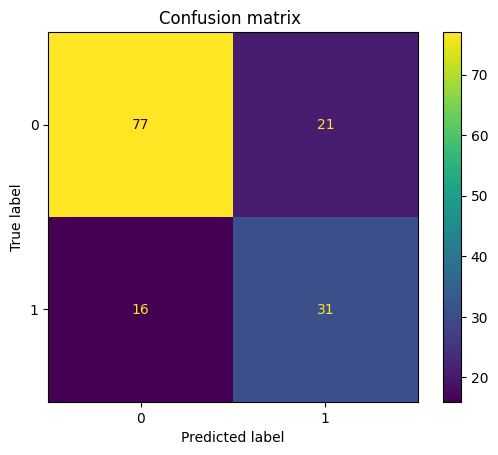

In [30]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Tính ma trận confusion matrix:
cnf_matrix_titanic = confusion_matrix(y_test,y_pred)

#Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix ')
plt.show()

ĐỘ  chính xác của mô hình trên tập Train:  0.7958477508650519
Đọ chính xác trên tập test:  0.7448275862068966
=>  có thể cho thấy mô hình đang bị overfitting

###  Thay đổi tham số của mô hình
---
* n_neighbors: số điểm lân cận (K nên chọn là số lẻ)
* weights: Đánh trọng số cho các điểm lân cận**
    * Trong kỹ thuật major voting bên trên, mỗi trong 11 điểm gần nhất được coi là có vai trò như nhau và giá trị lá phiếu của mỗi điểm này là như nhau. Trong thực tế ta thấy rằng những điểm gần hơn nên có trọng số cao hơn (càng thân cận thì càng tin tưởng). Vậy nên sẽ đánh trọng số khác nhau cho mỗi trong 11 điểm gần nhất này. Cách đánh trọng số phải thoải mãn điều kiện là một điểm càng gần điểm test data thì phải được đánh trọng số càng cao (tin tưởng hơn).

    * Scikit-learn giúp chúng ta đơn giản hóa việc này bằng cách gán gía trị weights = 'distance'. (Giá trị mặc định của weights là 'uniform', tương ứng với việc coi tất cả các điểm lân cận có giá trị như nhau như ở trên).

In [31]:
9# Khai bảo mô hình mới bằng cách Thay đổi tham số n_neighbors, weights:
KNN_Diabetes2 = KNeighborsClassifier(n_neighbors=19,
                                   p=1,
                                   weights='uniform')
#Các tham số mới của Model:
KNN_Diabetes2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 19,
 'p': 1,
 'weights': 'uniform'}

In [32]:
#Thực hiện huấn luyện với dữ liệu tập train
KNN_Diabetes2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19, p=1)

In [33]:
#Độ chính xác của Model trên tập Huấn luyện
acc_train = KNN_Diabetes2.score(X_train,y_train)

print('Độ chính xác trên tập huấn luyện:', round(acc_train*100,2))

Độ chính xác trên tập huấn luyện: 78.2


In [34]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred2 = KNN_Diabetes2.predict(X_test)

print("Kết quả dự đoán hành khách được cứu hay không được cứu trên tập dữ liệu TEST:")
print("Kết quả cho 20 hành khách đầu tiên:")
print("Predicted labels: ", y_pred2[:20])
print("Ground truth    : ", y_test[:20])

Kết quả dự đoán hành khách được cứu hay không được cứu trên tập dữ liệu TEST:
Kết quả cho 20 hành khách đầu tiên:
Predicted labels:  [1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1]
Ground truth    :  [1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1]


In [35]:
#1.Đếm số mẫu dự đoán đúng:
acc21 = accuracy_score(y_test, y_pred2, 
                       normalize=False)
print('Tổng số mẫu dự đoán đúng:', acc21, ' /', len(y_test))

Tổng số mẫu dự đoán đúng: 113.0  / 145


In [36]:
#2.Tính độ chính xác %:
acc22 = accuracy_score(y_test, y_pred2,
                       normalize=True)

print('Độ chính xác của mô hình(k=19, weights=uniform):', acc22)
print('Độ chính xác theo %:', round(acc22*100,2))

Độ chính xác của mô hình(k=19, weights=uniform): 0.7793103448275862
Độ chính xác theo %: 77.93


Confusion matrix - :
[[85 13]
 [19 28]]


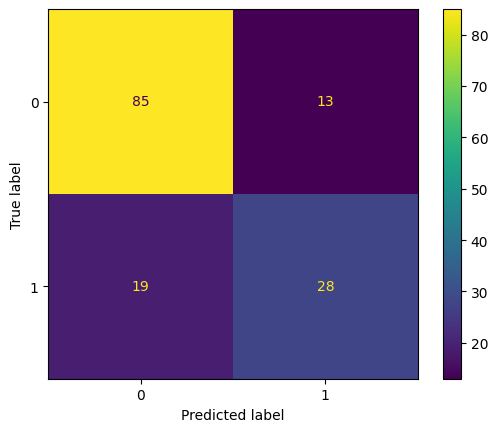

In [37]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Tính toán ma trận
cnf_matrix_Diabetes  = confusion_matrix(y_test,y_pred2)

#Hiển thị ma trân:
print('Confusion matrix - :')
print(cnf_matrix_Diabetes)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
plt.show()

In [38]:
# Import các thư viện cần thiết để đánh giá mô hình
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score


In [39]:
# Dự đoán nhãn của tập Test
# Sử dụng mô hình KNN đã huấn luyện để dự đoán nhãn trên tập dữ liệu kiểm tra
y_pred = KNN_Diabetes2.predict(X_test)


In [40]:
# Tính toán Precision (độ chính xác của dự đoán dương)
precision = precision_score(y_test, y_pred)
print("Precision (Độ chính xác - Precision):", precision)

# Tính toán Recall (Khả năng phát hiện đúng các trường hợp dương)
recall = recall_score(y_test, y_pred)
print("Recall (Khả năng phát hiện - Recall):", recall)

# Tính toán F1-Score (Trung bình hài hòa giữa Precision và Recall)
f1 = f1_score(y_test, y_pred)
print("F1-Score (Điểm F1):", f1)

Precision (Độ chính xác - Precision): 0.6829268292682927
Recall (Khả năng phát hiện - Recall): 0.5957446808510638
F1-Score (Điểm F1): 0.6363636363636364


In [41]:
report = classification_report(y_test, y_pred, target_names=["Không mắc bệnh", "Mắc bệnh"])
print(report)


                precision    recall  f1-score   support

Không mắc bệnh       0.82      0.87      0.84        98
      Mắc bệnh       0.68      0.60      0.64        47

      accuracy                           0.78       145
     macro avg       0.75      0.73      0.74       145
  weighted avg       0.77      0.78      0.78       145



## 8. Sử dụng mô hình
. Sử dụng model xây dựng được, dự đoán Bệnh nhân với các thông số như sau có bị mắc 
bệnh tiểu đường hay không? 

• Pregnancies:  0 

• Glucose: 128 

• BloodPressure: 78

• SkinThickness: 30 

• Insulin: 138 

• BMI: 30 

• DiabetesPedigreeFunction: 1.18 

• Age: 23 

In [42]:
# Thông số của bệnh nhân
Pre = 0
Glu = 128
Blo= 78
Ski = 30
Ins = 138
BMI = 30
Dia = 1.18
Age = 23

# Tạo mảng dữ liệu
patient_data =  np.array([[Pre,Glu,Blo,Ski,Ins,BMI,Dia,Age]])
print("Thông số bệnh nhân:",patient_data)


Thông số bệnh nhân: [[  0.   128.    78.    30.   138.    30.     1.18  23.  ]]


In [43]:
#Sử dụng mô hình để dự đoán cho bệnh nhân:

pred_customer1 = KNN_Diabetes2.predict(patient_data)
print(pred_customer1)
if(pred_customer1==1):
    print("Kết quả dự đoán bạn bị mắc bệnh tiểu đường")
else:
    print("Không mắc bệnh tiểu đường")




[0]
Không mắc bệnh tiểu đường
